<a href="https://colab.research.google.com/github/BrundaSreedhar/CPSC5310-Machine-Learning/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EX2


## Data Analysis using simple plots

- Review the examples of basic visualization using Python libraries and Pandas.

## Advertising data

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

A toy dataset for your exploratory data analysis:

./data/Advertising.csv

In [31]:
import pandas as pd

In [32]:
# read CSV file stored in the current directory and save the results
data = pd.read_csv('./data/Advertising.csv', skipinitialspace=True, index_col=0)

# display the first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
3/11/19,230.1,37.8,69.2,22.1
3/12/19,44.5,39.3,45.1,10.4
3/13/19,17.2,45.9,69.3,9.3
3/14/19,151.5,41.3,58.5,18.5
3/15/19,180.8,10.8,58.4,12.9


What are the features?
- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

What is the response?
- **Sales:** sales of a single product in a given market (in thousands of items)

What else do we know?
- Because the response variable is continuous, this is a **regression** problem.
- There are 200 **observations** (represented by the rows), and each observation is a single market.

In [33]:
#display all data. You can uncomment the code in the next line

display(data)

#data.shape

,TV,Radio,Newspaper,Sales
3/11/19,230.1,37.8,69.2,22.1
3/12/19,44.5,39.3,45.1,10.4
3/13/19,17.2,45.9,69.3,9.3
3/14/19,151.5,41.3,58.5,18.5
3/15/19,180.8,10.8,58.4,12.9
...,...,...,...,...
9/22/19,38.2,3.7,13.8,7.6
9/23/19,94.2,4.9,8.1,9.7
9/24/19,177.0,9.3,6.4,12.8
9/25/19,283.6,42.0,66.2,25.5


## Part 1 Tasks

Create cells to solve each of the following problems.

(1) For each field of the data, what is the mean of the data? What is the median? Are there any dataset has mode value?

In [38]:
print("Mean of each field:")
print(data.mean())

print("\nMedian of each field:")
print(data.median())

print("\nMode of each field:")
print(data.mode())

Mean of each field:
TV           147.0425
Radio         23.2640
Newspaper     30.5540
Sales         14.0225
dtype: float64

Median of each field:
TV           149.75
Radio         22.90
Newspaper     25.75
Sales         12.90
dtype: float64

Mode of each field:
      TV  Radio  Newspaper  Sales
0   17.2    4.1        8.7    9.7
1   76.4    5.7        9.3    NaN
2  109.8    NaN       25.6    NaN
3  177.0    NaN        NaN    NaN
4  184.9    NaN        NaN    NaN
5  197.6    NaN        NaN    NaN
6  199.8    NaN        NaN    NaN
7  222.4    NaN        NaN    NaN
8  237.4    NaN        NaN    NaN
9  240.1    NaN        NaN    NaN


TV is a field with mode values


(2) For each field of the data, give the five-number summary, minimum, the first quartile (Q1), median, the third quartile (Q3), and maximum of the data.

In [41]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


(3) For each field of the data, visulize a boxplot of the data and compare it to your answer in (b).

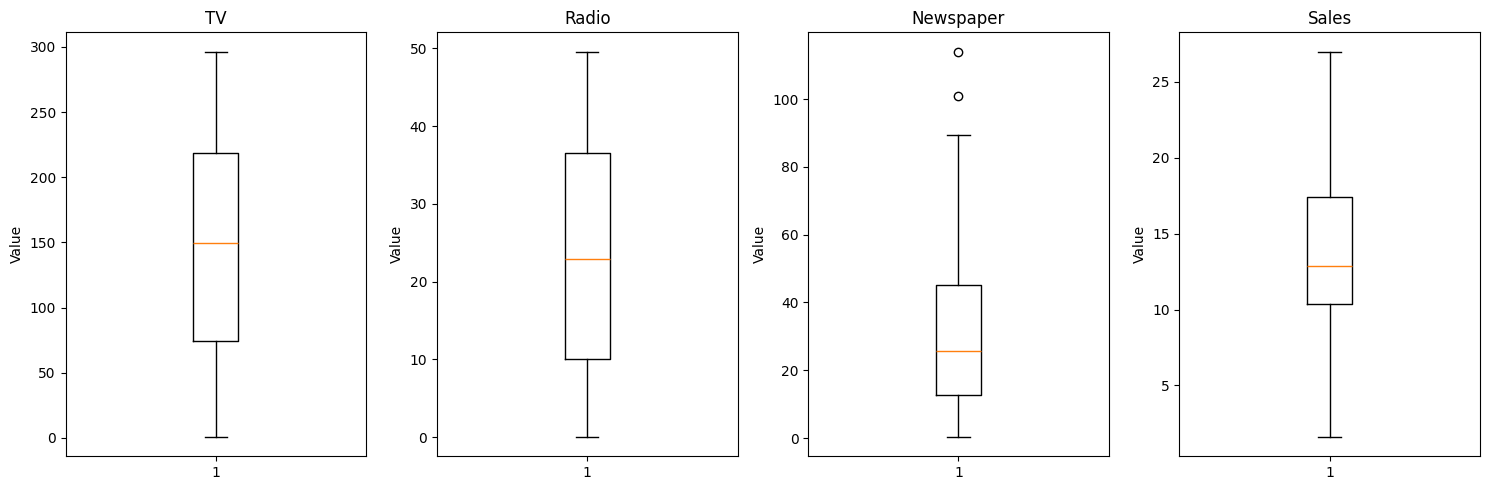

In [48]:
import matplotlib.pyplot as plt

# Create a figure and an axes object
fig, axes = plt.subplots(nrows=1, ncols=len(data.columns), figsize=(15, 5))

# Plot a boxplot for each column
for i, column in enumerate(data.columns):
    axes[i].boxplot(data[column])
    axes[i].set_title(column)
    axes[i].set_ylabel("Value")

plt.tight_layout()
plt.show()

The boxplot shows:
- The box represents Q1 to Q3
- The line inside the box is the median
- The whiskers extend to min and max
- Any points beyond the whiskers are outliers

(4) For Sales, visualize distribution of the data using histogram. Comment on the data’s modality (i.e., bimodal, trimodal, etc.)


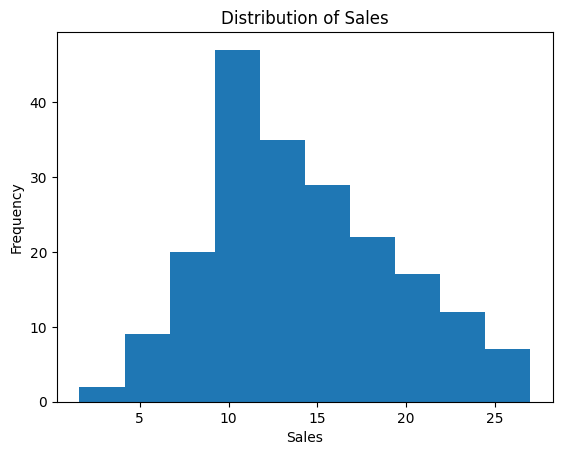

In [35]:
import matplotlib.pyplot as plt

plt.hist(data['Sales'], bins=10)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

The histogram is unimodal with one prominent peak.

(5) For Sales, visualize the trend of the data over time using a graph.

/tmp/ipython-input-393502977.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data.index)


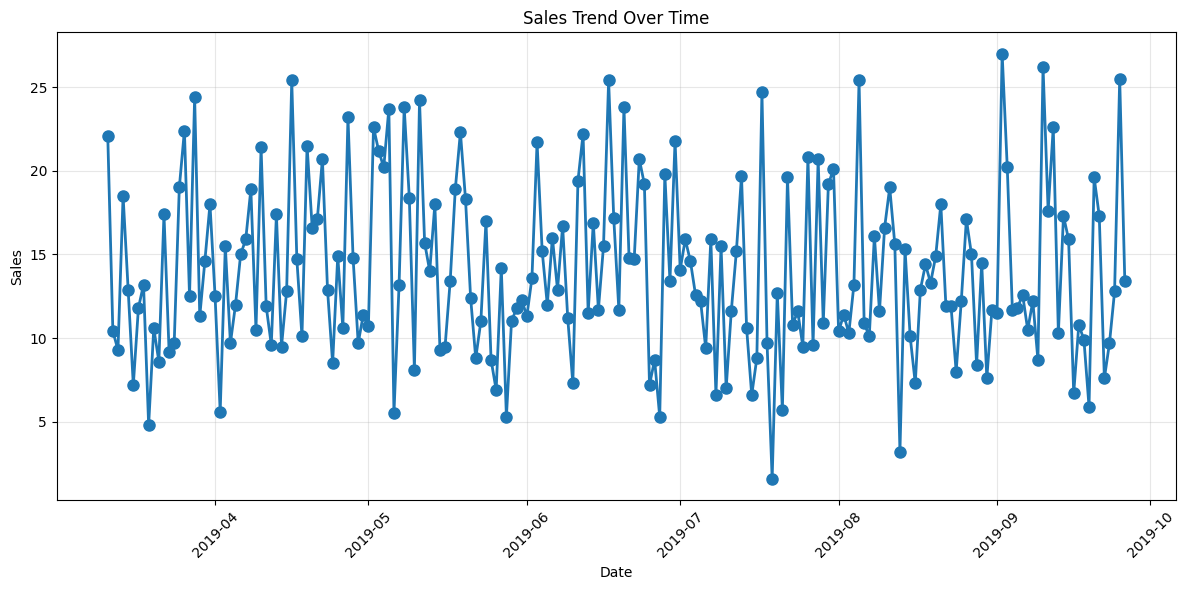

In [47]:
from matplotlib import lines
from numpy import ma
import matplotlib.pyplot as plt

data['Date'] = pd.to_datetime(data.index)
data.set_index('Date', inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Sales'], linewidth=2, marker='o', markersize=8, linestyle='-')
plt.xticks(rotation=45)
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#what does this trend indicate



(6) For each pair (TV-Sales, Radio-Sales, Newspaper-Sales), calculate the Pearson's correlation coefficient factor r.

In [39]:
print("Pearson's correlation coefficient between TV and Sales:")
print(data['TV'].corr(data['Sales']))

print("\nPearson's correlation coefficient between Radio and Sales:")
print(data['Radio'].corr(data['Sales']))

print("\nPearson's correlation coefficient between Newspaper and Sales:")
print(data['Newspaper'].corr(data['Sales']))

Pearson's correlation coefficient between TV and Sales:
0.7822244248616061

Pearson's correlation coefficient between Radio and Sales:
0.5762225745710551

Pearson's correlation coefficient between Newspaper and Sales:
0.22829902637616528



(7) For each pair (TV-Sales, Radio-Sales, Newspaper-Sales), visualize scatter graph.

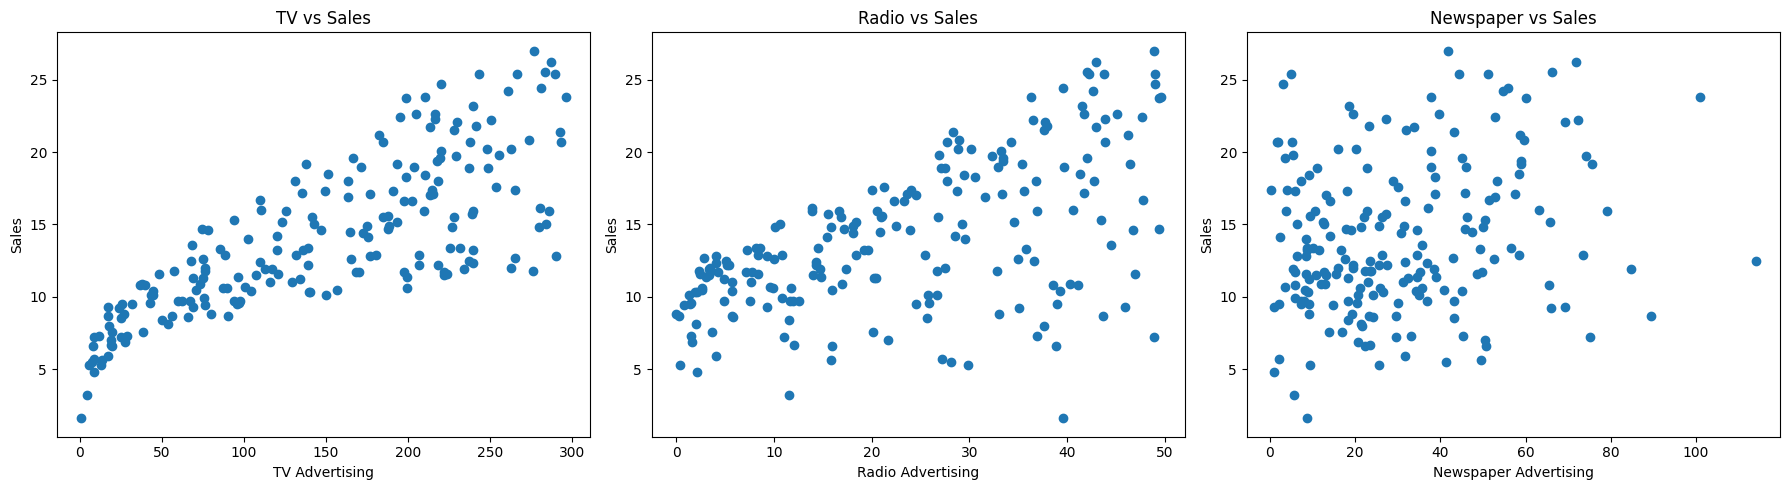

In [37]:
import matplotlib.pyplot as plt

# Create subplots for each scatter plot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# TV vs Sales
axes[0].scatter(data['TV'], data['Sales'])
axes[0].set_title('TV vs Sales')
axes[0].set_xlabel('TV Advertising')
axes[0].set_ylabel('Sales')

# Radio vs Sales
axes[1].scatter(data['Radio'], data['Sales'])
axes[1].set_title('Radio vs Sales')
axes[1].set_xlabel('Radio Advertising')
axes[1].set_ylabel('Sales')

# Newspaper vs Sales
axes[2].scatter(data['Newspaper'], data['Sales'])
axes[2].set_title('Newspaper vs Sales')
axes[2].set_xlabel('Newspaper Advertising')
axes[2].set_ylabel('Sales')

plt.tight_layout()
plt.show()

(8) Discuss what the differences are between the three: (a) boxplot, (b) histogram, and (c) scatter plot with respect to founding.

The boxplot help visualize the five-number summary - min, max, q1, median and q3. It also helps identify the outliers ie values that are far from majority of the data values.

The histogram helps visualise the distribution shape like modality and how skewed it is.

The scatter plot helps visualise the trends/clusters and possible non-linear relationships. It is useful in identifying relationship between the two variables and the correlation pattern.

## Part 2
It is good practice to write a summary of your findings from data anlaysis.

There is a strong relationship between TV and sales. TV advertising shows a strong positive correlation with Sales (Pearson’s r ≈ 0.78), indicating that increases in TV ad spend are closely associated with higher sales.

Radio advertising has a moderate positive correlation with Sales (r ≈ 0.58), suggesting it contributes to sales, though less strongly than TV.

Newspaper advertising exhibits a weak positive correlation with Sales (r ≈ 0.23), implying a limited relationship compared to TV and Radio.

The sales trend over time plotted as a graph helps identify any trends, patterns, or seasonality in the sales data.


The relationship between ad spend and sales appears unimodal, with a single dominant trend rather than multiple distinct patterns, particularly driven by TV advertising.

### Resources

#### Boxplot
https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51


- matplotlib.pyplot boxplot demo
https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html


#### matplotlib.pyplot
- scatter plot
https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.scatter.html


- histogram plot
https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.hist.html


#### pandas DataFrame
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html


- describe()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html


- corr()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html


- hist()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html


- plot.scatter()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html


- pivot()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html